<a href="https://colab.research.google.com/github/RobertPhamDA/Python-Education_Analysis/blob/main/Educational_Result_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st

In [67]:
df = pd.DataFrame({'Class':[10,10,11,12,11,12,10,11,10,12,12,10],
                   'name':['nam','tuan','nhan','tung','nhung','nam','ngan','na','hung','bach','chu',np.nan],
                   'math':[10,9,10,8,5,6,7,3,4,6,8,7],
                   'physic':[10,4,4,5,7,4,2,3,4,5,7,8],
                   'chemical':[3,np.nan,np.nan,np.nan,np.nan,np.nan,5,8,5,6,3,np.nan],
                   'english':[np.nan,4,7,9,8,6,np.nan,np.nan,np.nan,np.nan,np.nan,6]})
df

,Class,name,math,physic,chemical,english
0,10,nam,10,10,3.0,NaN
1,10,tuan,9,4,NaN,4.0
2,11,nhan,10,4,NaN,7.0
3,12,tung,8,5,NaN,9.0
4,11,nhung,5,7,NaN,8.0
5,12,nam,6,4,NaN,6.0
6,10,ngan,7,2,5.0,NaN
7,11,na,3,3,8.0,NaN
8,10,hung,4,4,5.0,NaN
9,12,bach,6,5,6.0,NaN


In [68]:
df['sum'] = df.math + df.physic + np.where(pd.isna(df.chemical), df.english, df.physic)
df

,Class,name,math,physic,chemical,english,sum
0,10,nam,10,10,3.0,NaN,30.0
1,10,tuan,9,4,NaN,4.0,17.0
2,11,nhan,10,4,NaN,7.0,21.0
3,12,tung,8,5,NaN,9.0,22.0
4,11,nhung,5,7,NaN,8.0,20.0
5,12,nam,6,4,NaN,6.0,16.0
6,10,ngan,7,2,5.0,NaN,11.0
7,11,na,3,3,8.0,NaN,9.0
8,10,hung,4,4,5.0,NaN,12.0
9,12,bach,6,5,6.0,NaN,16.0


In [69]:
df['result'] = df['sum'].apply(lambda x: 'Passed' if x>=20 else 'NotPassed')
df

,Class,name,math,physic,chemical,english,sum,result
0,10,nam,10,10,3.0,NaN,30.0,Passed
1,10,tuan,9,4,NaN,4.0,17.0,NotPassed
2,11,nhan,10,4,NaN,7.0,21.0,Passed
3,12,tung,8,5,NaN,9.0,22.0,Passed
4,11,nhung,5,7,NaN,8.0,20.0,Passed
5,12,nam,6,4,NaN,6.0,16.0,NotPassed
6,10,ngan,7,2,5.0,NaN,11.0,NotPassed
7,11,na,3,3,8.0,NaN,9.0,NotPassed
8,10,hung,4,4,5.0,NaN,12.0,NotPassed
9,12,bach,6,5,6.0,NaN,16.0,NotPassed


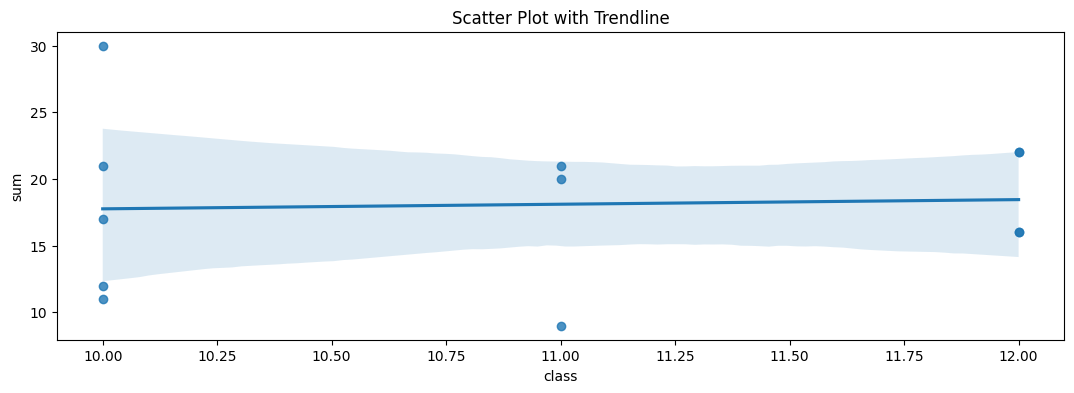

In [71]:
plt.figure(figsize=(13,4))

sns.regplot(x='Class', y='sum', data=df)

plt.xlabel('class')
plt.ylabel('sum')
plt.title('Scatter Plot with Trendline')

plt.show()

In [72]:
df.groupby(['Class'],as_index=False).agg(mean = ('sum','mean'),
                                         median = ('sum','median'),
                                         Passed = ('result', lambda x: x[x=='Passed'].count()),
                                         count = ('result','count')).sort_values(by='mean', ascending =False)

,Class,mean,median,Passed,count
2,12,19.000000,19.0,2,4
0,10,18.200000,17.0,2,5
1,11,16.666667,20.0,2,3


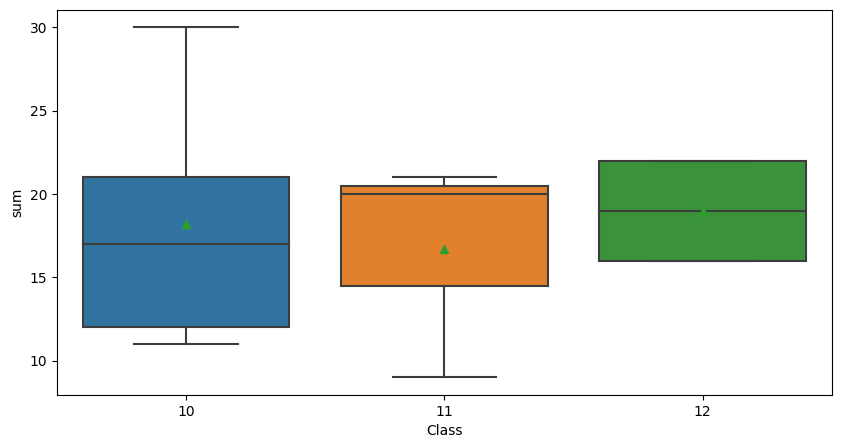

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Class', y='sum',showmeans=True)
plt.show()

In [77]:
import scipy.stats as st

t_statistics, p_value = st.ttest_ind(df[df.Class==10]['sum'],df[df.Class==11]['sum'])
print('p_value',p_value)
print('t_stat', t_statistics)

if p_value < 0.05:
  print('reject null hypothesis and the difference is significant between two groups')
else:
  print('can not reject null hypothesis and the difference is not significant between two groups')

p_value 0.7858077794823055
t_stat 0.2842034127250411
can not reject null hypothesis and the difference is not significant between two groups
